<a href="https://colab.research.google.com/github/Ad0ol/Computer-Vision-Techniques-for-Image-Segmentation/blob/master/4_Watershed_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.metrics import (adapted_rand_error, variation_of_information) 
#from skimage.segmentation import watershed

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


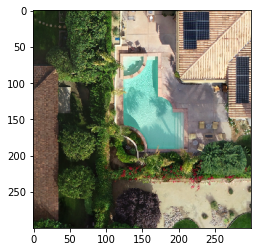

In [0]:
path0 = '/content/gdrive/My Drive/Adal&Norah-Project-CEN546/sample_images/'
path = path0+'image-chips/'

image = cv2.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)


(300, 300, 3)


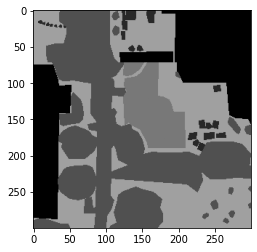

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
plt.imshow(GT*40)

# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND


Text(0.5, 1.0, 'Watershed Segmentation')

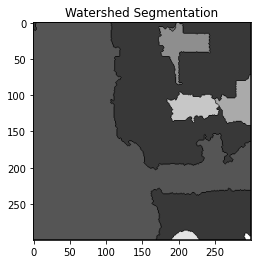

In [0]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=5)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,5)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

image_segmented = cv2.watershed(image,markers)
image[image_segmented == -1] = [255,0,0]
plt.imshow(image_segmented, cmap='gray')
plt.title("Watershed Segmentation")


Text(0.5, 1.0, 'Grount Truth')

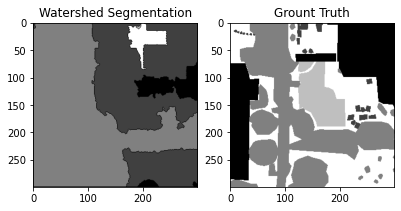

In [0]:
image_segmented_new = np.zeros(image_segmented.shape)
idx = image_segmented==0
image_segmented_new[idx] = 0
idx = image_segmented==1
image_segmented_new[idx] = 1
idx = image_segmented==2
image_segmented_new[idx] = 2
idx = image_segmented==3
image_segmented_new[idx] = 3
idx = image_segmented==4
image_segmented_new[idx] = 4

image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
plt.title("Watershed Segmentation")
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
plt.title("Grount Truth")
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4

In [0]:

Grount_truth_img = rgb2gray(GT)
print(np.unique(Grount_truth_img))

Grount_truth_pixcels=np.around(Grount_truth_img*1000,decimals=0)

Grount_truth_pixcelsInt=Grount_truth_pixcels.astype(int)
print(np.unique(Grount_truth_pixcelsInt))
print(Grount_truth_pixcelsInt.shape)

[0.         0.00392157 0.00784314 0.01176471 0.01568628]
[ 0  4  8 12 16]
(300, 300)


90000
300
[0 1 2 3 4]
[0 1 2 3 4]
(300, 300)


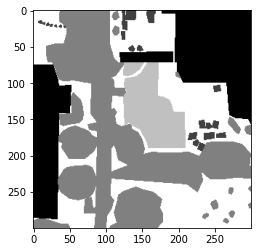

In [0]:
Grount_truth_img_Test = Grount_truth_pixcelsInt.copy()
Grount_truth_img_Test = Grount_truth_pixcelsInt.reshape(Grount_truth_pixcelsInt.shape[0]*Grount_truth_pixcelsInt.shape[1])
for i in range(Grount_truth_img_Test.shape[0]):
    if Grount_truth_img_Test[i] == 0:
        Grount_truth_img_Test[i] = 0  
    elif Grount_truth_img_Test[i] == 4:
        Grount_truth_img_Test[i] = 1 
    elif Grount_truth_img_Test[i] == 8:  
        Grount_truth_img_Test[i] = 2  
    elif Grount_truth_img_Test[i] == 12:  
        Grount_truth_img_Test[i] = 3  
    elif Grount_truth_img_Test[i] == 16:  
        Grount_truth_img_Test[i] = 4  

print (Grount_truth_img_Test.shape[0])    
Grount_truth_pixcelsInt = Grount_truth_img_Test.reshape(Grount_truth_pixcelsInt.shape[0],Grount_truth_pixcelsInt.shape[1])
print (Grount_truth_pixcelsInt.shape[0])    

print(np.unique(Grount_truth_pixcelsInt))
gray_rInt=image_segmented_new.astype(int)

print(np.unique(gray_rInt))
print(gray_rInt.shape)
plt.imshow(Grount_truth_pixcelsInt, cmap='gray')


In [0]:
error, precision, recall = adapted_rand_error(Grount_truth_pixcelsInt, gray_rInt)
print("Error: " , error*100)
print("Precision: " , precision*100)
print("Recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_pixcelsInt, gray_rInt)

def Cal_accuracy(classification_scores, true_labels):
    classification_scoresC = classification_scores.copy()
    classification_scoresC = classification_scores.reshape(classification_scores.shape[0]*classification_scores.shape[1])
    true_labelsC = true_labels.copy()
    true_labelsC = true_labels.reshape(true_labels.shape[0]*true_labels.shape[1])
        
    num_correct = 0
    for i in range(len(classification_scoresC)):
        if classification_scoresC[i] == true_labelsC[i]:
            num_correct += 1
    return num_correct / len(true_labelsC)

ACC=Cal_accuracy(Grount_truth_pixcelsInt, gray_rInt)
print("Pixel Accuracy: ", ACC*100)

Error:  38.489600699593694
Precision:  65.8467018376448
Recall:  57.70993930402063
Pixel Accuracy:  37.336666666666666
